## 신경망 모델 훈련

### 손실 곡선

- 케아스의 fit() 메서드는 History 클래스 객체를 반환

- History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 모델 만들기
# 모델을 ㅁ나드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if문 역할
- model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것

In [4]:
# model_fn() 호출
model = model_fn()
model.summary()

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# fit() 메서드의 결과를 history 변수에 저장
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target,
                    epochs=5, verbose = 0)

In [9]:
# 딕셔너리 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- 케라스에는 기본적으로 에포크마다 손실을 계산

- 정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함
- history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트

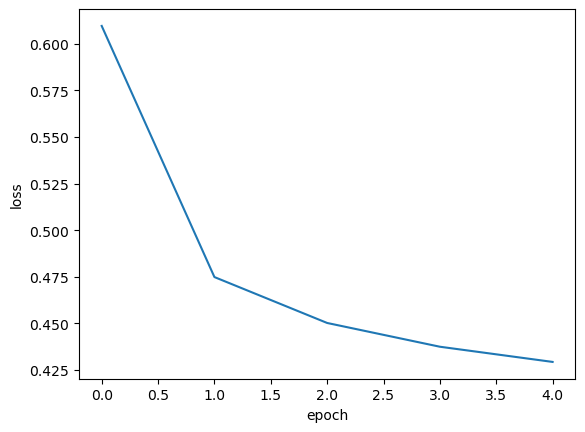

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

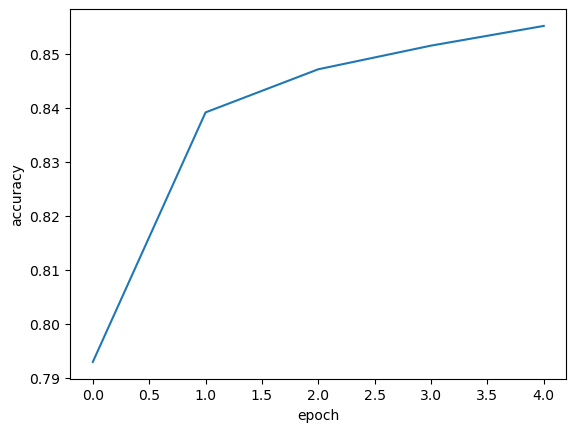

In [11]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


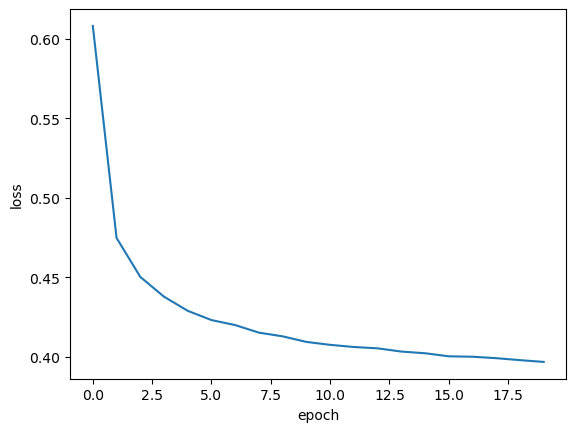

In [12]:
# 에포크 횟수를 늘려서 모델 훈련, 그래프
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요


- 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수

- 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음
- 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다

- 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달

In [13]:
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target,
                    epochs=20, verbose = 0,
                    validation_data=(val_scaled, val_target))

In [14]:
# 변환된 history.history딕셔너리에 어떤 값이 들어 있는지 키 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


- 검증 세트에 대한 손실 -> 'val_loss'

- 정확도 -> 'val_accuracy'

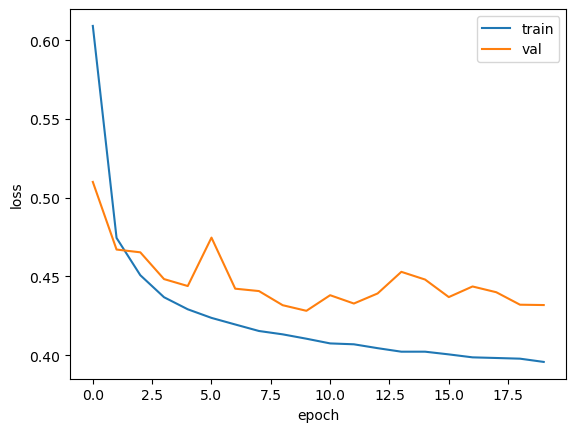

In [15]:
# 훈련 손실과 검증 손실을 한 그래프에 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Adam 옵티마이저
- 적응적 학습을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있음

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


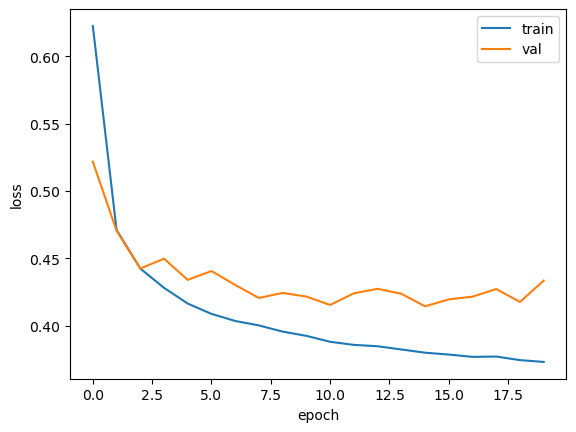

In [16]:
model = model_fn()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target,
                    epochs=20, verbose = 0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃

드롭아웃(dropout)
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴련의 출력을 0으로 만들어) 과대적합을 막는다

- 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼파라미터

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함

- 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 신경망은 더 안정적인 예측을 만들 수 있음

- 앙상블 학습 : 더 좋은 예측 결과를 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘
 

- 케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공함
- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다

- 드롭이웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다

In [18]:
# model_fn() 함수에 드롭아웃 층 추가
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

- 은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없음

- 입력과 출력의 크기가 같음
- 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다

- 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 함

- 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있음

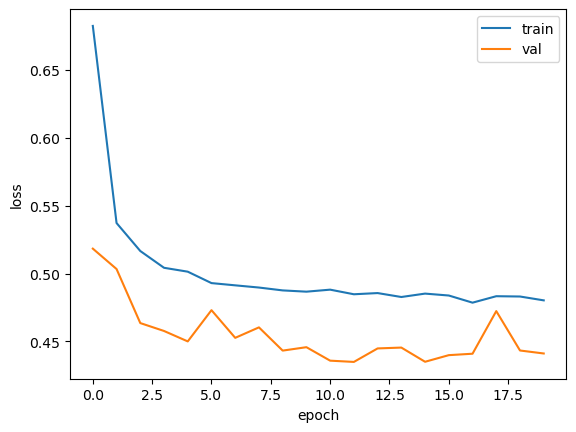

In [19]:
# 훈련 손실과 검증 손실 그래프 그리기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target,
                    epochs=20, verbose = 0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 저장과 복원


In [20]:
# 에포크 횟수를 10으로 다시 지정하고 모델을 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target,
          epochs=10, verbose = 0,
          validation_data=(val_scaled, val_target))

- 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공

- 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 .h5일 경우 HDF5 포맷으로 저장

In [22]:
model.save_weights('model.weights.h5')

In [23]:
model.save('model-whole.h5')

In [24]:
# 파일이 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r--  1 youju  staff  114568 Jan 26 13:57 model-whole.h5
-rw-r--r--  1 youju  staff  113592 Jan 26 13:57 model.weights.h5


In [25]:
# 1. 훈련하지 않는 새로운 모델을 만들고 model-weightd.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1. 
- 훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터는 적재함

- 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weights() 메서드

- load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

- 그렇지 않으면 에러가 발생

- 케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환

In [26]:
# 10개의 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step
0.84225


- 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수 사용

- 이 함수는 배열에서 가장 큰 값의 인덱스를 반환
- axis = -1은 배열의 마지막 차원을 따라 최댓값을 고른다

- axis = 1이면 열을 따라 각 행의 최댓값의 인덱스를 선택

- axis = 0이면 행을 따라 각 열의 최댓값의 인덱스를 선택

- 그 다음 라인은 argmax()로 고른 인덱스와 타깃을 비교

- 두 배열에서 각 위치의 값이 같으면 1이 되고 다르면 0이 된다
- 이를 평균하면 정확도가 됨

In [27]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8422 - loss: 0.4538


[0.4537593722343445, 0.8422499895095825]

### 콜백

콜백(callback)
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

- keras.callbacks 패키지 아래에 있는 클래스들
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
- 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장
- save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장 가능

In [28]:
# 저장될 파일 이름을 'best-model.h5'로 지정하고 콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target,
          epochs=20, verbose = 0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달

- 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장

In [29]:
# 모델을 load_model() 함수로 읽어서 예측 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.8518 - loss: 0.4332


[0.4332064986228943, 0.8518333435058594]

- ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장

- 하지만 여전히 20번의 에포크 동안 훈련을 함
- 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음


조기종료(early stopping)
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것

- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있음

- 케라스에서는 조기 종료를 위한 EarlyStopping 콜백을 제공

- 이 콜백의 practice 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정

- EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다

- 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target,
          epochs=20, verbose = 0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

/Users/youju/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

7


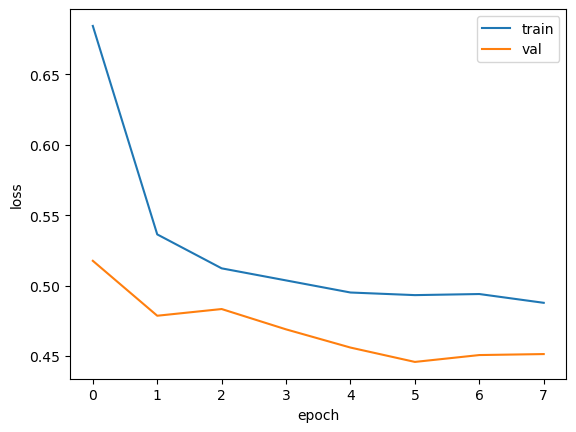

In [32]:
# 훈련 손실과 검증 손실 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [33]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8448 - loss: 0.4457


[0.44570308923721313, 0.8448333144187927]